<a href="https://colab.research.google.com/github/beatrizmaenisi/desafio_dio_transfer_learning/blob/main/Transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import os
import zipfile
import random
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile

In [5]:
from google.colab import files
uploaded = files.upload()

Saving kagglecatsanddogs_5340.zip to kagglecatsanddogs_5340.zip


In [6]:
local_zip = 'kagglecatsanddogs_5340.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [7]:
print(len(os.listdir('/tmp/PetImages/Cat/')))
print(len(os.listdir('/tmp/PetImages/Dog/')))

#Expected output
#12501

12501
12501


In [8]:
try:
  os.mkdir("/tmp/cats-v-dogs")
  os.mkdir("/tmp/cats-v-dogs/training")
  os.mkdir("/tmp/cats-v-dogs/testing")
  os.mkdir("/tmp/cats-v-dogs/training/cats")
  os.mkdir("/tmp/cats-v-dogs/training/dogs")
  os.mkdir("/tmp/cats-v-dogs/testing/cats")
  os.mkdir("/tmp/cats-v-dogs/testing/dogs")
except OSError:
  pass

In [9]:
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
  files = []
  for filename in os.listdir(SOURCE):
    file = SOURCE + filename
    if os.path.getsize(file) > 0:
      files.append(filename)
    else:
      print(filename + " is zero length, so ignoring.")

  training_length = int(len(files) * SPLIT_SIZE)
  testing_length = int(len(files) - training_length)
  shuffled_set = random.sample(files, len(files))
  training_set = shuffled_set[0:training_length]
  testing_set = shuffled_set[-testing_length:]

  for filename in training_set:
    this_file = SOURCE + filename
    destination = TRAINING + filename
    copyfile(this_file, destination)

  for filename in testing_set:
    this_file = SOURCE + filename
    destination = TESTING + filename
    copyfile(this_file, destination)

CAT_SOURCE_DIR = "/tmp/PetImages/Cat/"
TRAINING_CATS_DIR = "/tmp/cats-v-dogs/training/cats/"
TESTING_CATS_DIR = "/tmp/cats-v-dogs/testing/cats/"
DOG_SOURCE_DIR = "/tmp/PetImages/Dog/"
TRAINING_DOGS_DIR = "/tmp/cats-v-dogs/training/dogs/"
TESTING_DOGS_DIR = "/tmp/cats-v-dogs/testing/dogs/"

split_size = .9
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size)

#Expected output
#666.jpg is zero lenght, so ignoring
#11702.jpg is zero lenght, so ignoring

666.jpg is zero length, so ignoring.
11702.jpg is zero length, so ignoring.


In [10]:
print(len(os.listdir('/tmp/cats-v-dogs/training/cats/')))
print(len(os.listdir('/tmp/cats-v-dogs/training/dogs/')))
print(len(os.listdir('/tmp/cats-v-dogs/testing/cats/')))
print(len(os.listdir('/tmp/cats-v-dogs/testing/dogs/')))

#Expected output
#11250
#11250
#1250
#1250

11250
11250
1250
1250


In [11]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
TRAINING_DIR = "/tmp/cats-v-dogs/training"
train_datagen = ImageDataGenerator(rescale=1.0/255.)
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=250,
                                                    class_mode='binary',
                                                    target_size=(150, 150))

VALIDATION_DIR = "/tmp/cats-v-dogs/testing"
validation_datagen = ImageDataGenerator(rescale=1.0/255.)
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=250,
                                                              class_mode='binary',
                                                              target_size=(150, 150))

#Expeted output
#Found 22498 images beloging to 2 classes
#Found 2500 images beloging to 2 classes

Found 22498 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


In [13]:
history = model.fit(train_generator, epochs=15, steps_per_epoch = 90,
                    validation_data=validation_generator, validation_steps=6)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
39/90 ━━━━━━━━━━━━━━━━━━━━ 4:27 5s/step - accuracy: 0.5186 - loss: 0.8978

/usr/local/lib/python3.11/dist-packages/PIL/TiffImagePlugin.py:950: UserWarning: Truncated File Read
  warnings.warn(str(msg))


90/90 ━━━━━━━━━━━━━━━━━━━━ 484s 5s/step - accuracy: 0.5325 - loss: 0.8014 - val_accuracy: 0.6160 - val_loss: 0.6689
Epoch 2/15
90/90 ━━━━━━━━━━━━━━━━━━━━ 502s 6s/step - accuracy: 0.6346 - loss: 0.6502 - val_accuracy: 0.6827 - val_loss: 0.6067
Epoch 3/15
90/90 ━━━━━━━━━━━━━━━━━━━━ 560s 6s/step - accuracy: 0.6831 - loss: 0.5950 - val_accuracy: 0.7113 - val_loss: 0.5586
Epoch 4/15
90/90 ━━━━━━━━━━━━━━━━━━━━ 504s 6s/step - accuracy: 0.7291 - loss: 0.5368 - val_accuracy: 0.7607 - val_loss: 0.5067
Epoch 5/15
90/90 ━━━━━━━━━━━━━━━━━━━━ 502s 6s/step - accuracy: 0.7526 - loss: 0.5028 - val_accuracy: 0.7393 - val_loss: 0.5065
Epoch 6/15
90/90 ━━━━━━━━━━━━━━━━━━━━ 502s 6s/step - accuracy: 0.7794 - loss: 0.4677 - val_accuracy: 0.8013 - val_loss: 0.4613
Epoch 7/15
90/90 ━━━━━━━━━━━━━━━━━━━━ 502s 6s/step - accuracy: 0.7963 - loss: 0.4367 - val_accuracy: 0.7853 - val_loss: 0.4467
Epoch 8/15
90/90 ━━━━━━━━━━━━━━━━━━━━ 562s 6s/step - accuracy: 0.8143 - loss: 0.4073 - val_accuracy: 0.7913 - val_loss: 0.

<Figure size 640x480 with 0 Axes>

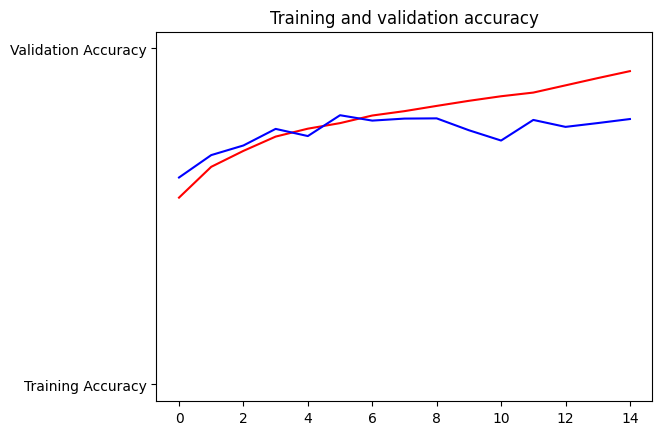

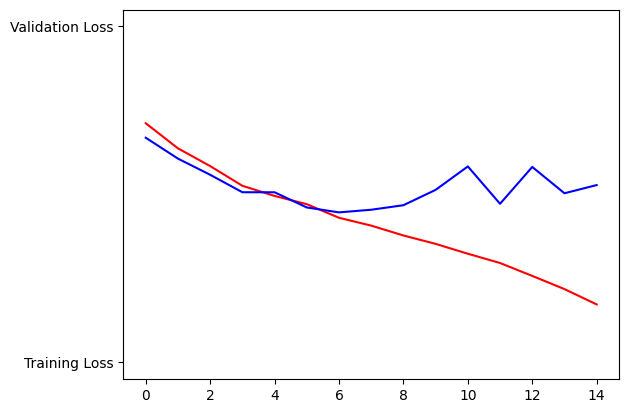

<Figure size 640x480 with 0 Axes>

In [14]:
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
accuracy=history.history['accuracy']
val_accuracy=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(accuracy)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, accuracy, 'r', "Training Accuracy")
plt.plot(epochs, val_accuracy, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.figure()


# Desired output. Charts with training and validation metrics. No crash :)

In [16]:
# Parte para ver como classificam as imagens
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a dog")
  else:
    print(fn + " is a cat")

Saving gato-laranja-e1748043537291.webp to gato-laranja-e1748043537291.webp
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
[0.]
gato-laranja-e1748043537291.webp is a cat
